In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Tcmb = 2.72e6

In [3]:
p, f = {}, {}
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',2048),('la',4096)]:
    for nu in ['93','145','225','coadd']:
        p[t+nu], f[t+nu], __ = prjlib.analysis_init(t=t,freq=nu)
        l, TT[t+nu], EE[t+nu], BB[t+nu] = np.loadtxt(f[t+nu].cmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+nu], EN[t+nu], BN[t+nu] = np.loadtxt(f[t+nu].cmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
pid, fid, r = prjlib.analysis_init(t='id',freq='145',lmax=4096)
l, TT['id'], EE['id'], BB['id'] = np.loadtxt(fid.cmb.scl['o'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,2048,2049)
s = l*(l+1.)*Tcmb**2/2./np.pi

In [4]:
# analytic noise
NT, NE, NB = prjlib.nlofficial(deproj=-1,cols=(3,4,5,6))

Temperature

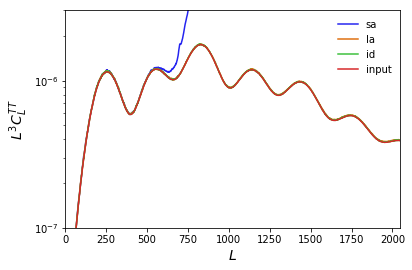

In [5]:
# TT
pl.plot_1dstyle(xmin=2,xmax=2048,ylab='$L^3C_L^{TT}$',ylog=True,ymin=1e-7,ymax=3e-6)
plot(L,L**3*TT['sa93'],label='sa')
plot(l,l**3*TT['la145'],label='la')
plot(l,l**3*TT['id'],label='id')
plot(l,l**3*r.lcl[0,:lmax+1],label='input')
legend()

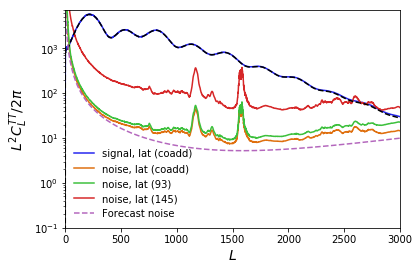

In [6]:
pl.plot_1dstyle(xmin=2,xmax=3000,ylab='$L^2C_L^{TT}/2\pi$',ylog=True,ymin=1e-1,ymax=7e3)
plot(l,s*TT['lacoadd'],label='signal, lat (coadd)')
plot(l,s*TN['lacoadd'],label='noise, lat (coadd)')
plot(l,s*TN['la93'],label='noise, lat (93)')
plot(l,s*TN['la145'],label='noise, lat (145)')
plot(l,s*r.lcl[0,:lmax+1],'k--')
plot(l,s*NT[:lmax+1]/Tcmb**2,'--',label='Forecast noise')
legend(loc=0)

Polarization

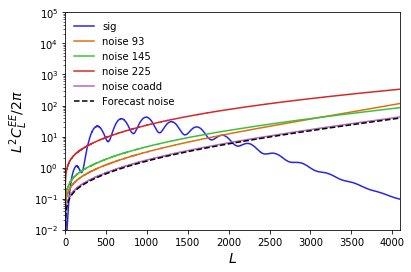

In [7]:
# EE + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{EE}/2\pi$',ylog=True,ymin=1e-2,ymax=1e5)
for nu in ['93','145','225','coadd']:
    if nu=='93':  plot(l,s*EE['la'+nu],label='sig')
    plot(l,s*EN['la'+nu],label='noise '+nu)
plot(l,s*NB[:lmax+1]/Tcmb**2,'k--',label='Forecast noise')
legend()

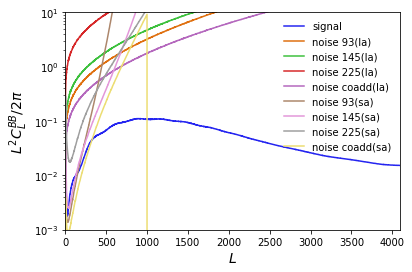

In [8]:
# BB + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{BB}/2\pi$',ylog=True,ymin=1e-3,ymax=1e1)
for t, l0 in [('la',l),('sa',L)]:
    for nu in ['93','145','225','coadd']:
        if t=='la' and nu=='93':  plot(l,s*BB[t+nu],label='signal')
        plot(l0,l0*(l0+1.)*BN[t+nu]/2./np.pi*Tcmb**2,label='noise '+nu+'('+t+')')
legend()